In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
X, y = mnist["data"], mnist["target"]

# X = an array containing pixel values (0,255)
# 70000 images, each image has 784 features (24*24)
X


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

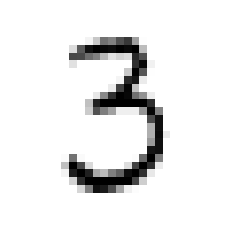

In [11]:
#grabbing one random pic
import matplotlib as mpl
import matplotlib.pyplot as plt

some_digit = X[50]
#reshapping X[n] into a 28*28 array
some_digit_img = some_digit.reshape(28,28)
plt.imshow(some_digit_img, cmap = "binary")
plt.axis("off")
plt.show()

In [47]:
#since the returning label is string, lets convert it back to int
y = y.astype(np.uint8)

X_train = X[:60000]
X_test = X[60000:]

y_train = y[:60000] 
y_test = y[60000:] 

y_train_3 = (y_train == 3)
y_test_3 = (y_test == 3)

In [49]:
# Training a Binary Classifier
# Is_3

# Stochastic Gradient Descent 
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier(random_state=42)
sgd_clf.fit(X_train, y_train_3)

SGDClassifier(random_state=42)

In [50]:
sgd_clf.predict([some_digit])

array([ True])

In [71]:
#checking accuracy
# 3 folds
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_3, cv=3, scoring="accuracy")

array([0.9496 , 0.9624 , 0.96275])

In [68]:
# There's always 90% chance that a letter won't be 3
# So that in this case, accuracy is not the best performance measure

from sklearn.base import BaseEstimator

class never_3(BaseEstimator):
    def fit(self, X, y = None):
        return self
    def predict(self, X):
        return np.zeros((len(X), 1), dtype = bool)
nv_3_clf = never_3()
cross_val_score(nv_3_clf, X_train, y_train_3, cv = 3, scoring="accuracy")


array([0.8962 , 0.89975, 0.8975 ])

In [72]:
from sklearn.model_selection import cross_val_predict

y_train_predict = cross_val_predict(sgd_clf, X_train, y_train_3, cv = 3)

array([False,  True])